In [2]:
# 공공 데이터 API 호출 서비스 키 모듈 호출
import api_keys

In [3]:
# 서울시 모든 구의 법정동 코드
region_codes = ['11110', '11140', '11170', '11200', '11215', '11230' '11260', '11290', '11305', '11320', '11335', '11350', '11380', '11410', '11440', '11470', '11500', '11530', '11545', '11560', '11590', '11620', '11650', '11680', '11710', '11740']

In [4]:
# 예시 데이터 출력
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcSilvTrade?serviceKey={api_keys.encoding_key}&LAWD_CD={region_codes[20]}&DEAL_YMD=202301'

response = urlopen(url)

result = BeautifulSoup(response,'xml')
items = result.find_all('item')

print(items)

[]


In [7]:
# 구의 법정동 코드를 전달해서 해당 구의 1월부터 5월까지 분양권 전매 내역을 조회
# 그 중 전용면적과 거래금액만을 추출해서 저장하는 함수
from bs4 import BeautifulSoup
from urllib.request import urlopen

datas = []

def get_datas(region_code):
    # 1월부터 5월까지의 거래내역
    for i in range(1,6):
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcSilvTrade?serviceKey={api_keys.encoding_key}&LAWD_CD={region_code}&DEAL_YMD=20230{i}'
        response = urlopen(url)
        result = BeautifulSoup(response,'xml')
        items = result.find_all('item')
        data = []
        for item in items:
            price = item.find('거래금액').text
            space = item.find('전용면적').text
            data = [price, space]
        if(len(data) != 0):
            datas.append(data)
        
for code in region_codes:
    print(code)
    get_datas(code)
    
print(datas)

11110
11140
11170
11200
11215
1123011260
11290
11305
11320
11335
11350
11380
11410
11440
11470
11500
11530
11545
11560
11590
11620
11650
11680
11710
11740
[['66,579', '42.29'], ['101,473', '59.74'], ['84,832', '84.9939'], ['104,650', '84.8985'], ['43,384', '38.996'], ['49,702', '39.975'], ['99,491', '84.9625'], ['76,500', '59.975'], ['82,000', '84.997'], ['69,000', '59.996'], ['89,000', '76.65'], ['85,186', '59.96'], ['50,500', '49.92'], ['87,000', '59.96'], ['125,000', '59.5'], ['120,000', '59.97'], ['120,000', '59.97'], ['148,000', '84.99'], ['93,300', '74.9982'], ['110,000', '59.93'], ['140,000', '84.9243'], ['145,000', '84.94'], ['147,500', '84.9243'], ['1,000,000', '200.93'], ['395,000', '101.99'], ['305,000', '84.97'], ['392,000', '84.98'], ['178,000', '59.9751'], ['168,658', '59.9742'], ['182,388', '59.9742'], ['250,000', '84.9642'], ['158,109', '84.99'], ['60,600', '49.795'], ['90,135', '84.1946'], ['112,200', '98.4933'], ['102,998', '84.1946']]


In [8]:
# 데이터 프레임 생성
import pandas as pd

df = pd.DataFrame(datas, columns=['price','space'])

print(df.head)

<bound method NDFrame.head of         price    space
0      66,579    42.29
1     101,473    59.74
2      84,832  84.9939
3     104,650  84.8985
4      43,384   38.996
5      49,702   39.975
6      99,491  84.9625
7      76,500   59.975
8      82,000   84.997
9      69,000   59.996
10     89,000    76.65
11     85,186    59.96
12     50,500    49.92
13     87,000    59.96
14    125,000     59.5
15    120,000    59.97
16    120,000    59.97
17    148,000    84.99
18     93,300  74.9982
19    110,000    59.93
20    140,000  84.9243
21    145,000    84.94
22    147,500  84.9243
23  1,000,000   200.93
24    395,000   101.99
25    305,000    84.97
26    392,000    84.98
27    178,000  59.9751
28    168,658  59.9742
29    182,388  59.9742
30    250,000  84.9642
31    158,109    84.99
32     60,600   49.795
33     90,135  84.1946
34    112,200  98.4933
35    102,998  84.1946>


In [9]:
# 이상데이터 제거
# 100억원에 거래된 200제곱미터의 아파트는 일반화하는 데에 어려움을 일으킬 수 있으므로
# 23번째 데이터를 삭제

df.drop([23], axis=0, inplace=True)

print(df.head)

<bound method NDFrame.head of       price    space
0    66,579    42.29
1   101,473    59.74
2    84,832  84.9939
3   104,650  84.8985
4    43,384   38.996
5    49,702   39.975
6    99,491  84.9625
7    76,500   59.975
8    82,000   84.997
9    69,000   59.996
10   89,000    76.65
11   85,186    59.96
12   50,500    49.92
13   87,000    59.96
14  125,000     59.5
15  120,000    59.97
16  120,000    59.97
17  148,000    84.99
18   93,300  74.9982
19  110,000    59.93
20  140,000  84.9243
21  145,000    84.94
22  147,500  84.9243
24  395,000   101.99
25  305,000    84.97
26  392,000    84.98
27  178,000  59.9751
28  168,658  59.9742
29  182,388  59.9742
30  250,000  84.9642
31  158,109    84.99
32   60,600   49.795
33   90,135  84.1946
34  112,200  98.4933
35  102,998  84.1946>


<function matplotlib.pyplot.show(close=None, block=None)>

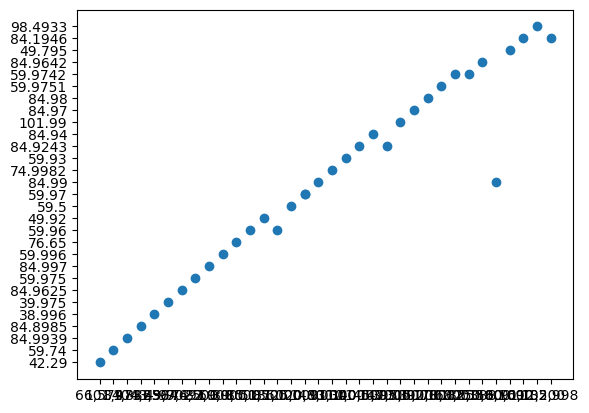

In [10]:
# 데이터 시각화
import matplotlib.pyplot as plt

price = df['price']
space = df['space']

plt.plot(price,space,'o')
plt.show

In [11]:
# 더 많은 데이터의 수집 필요
# 기존 데이터 수집 함수를 사용해서 작년 하반기의 데이터를 추가로 수집

new_datas = []

def get_datas(region_code):
    # 7월부터 9월
    for i in range(7,10):
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcSilvTrade?serviceKey={api_keys.encoding_key}&LAWD_CD={region_code}&DEAL_YMD=20220{i}'
        response = urlopen(url)
        result = BeautifulSoup(response,'xml')
        items = result.find_all('item')
        data = []
        for item in items:
            price = item.find('거래금액').text
            space = item.find('전용면적').text
            data = [price, space]
        if(len(data) != 0):
            new_datas.append(data)
    # 10월부터 12월
    for i in range(10,13):
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcSilvTrade?serviceKey={api_keys.encoding_key}&LAWD_CD={region_code}&DEAL_YMD=2022{i}'
        response = urlopen(url)
        result = BeautifulSoup(response,'xml')
        items = result.find_all('item')
        data = []
        for item in items:
            price = item.find('거래금액').text
            space = item.find('전용면적').text
            data = [price, space]
        if(len(data) != 0):
            new_datas.append(data)
            
for code in region_codes:
    get_datas(code)

df2 = pd.DataFrame(new_datas, columns=['price','space'])

print(df2.head)

<bound method NDFrame.head of       price     space
0   105,000     59.99
1    90,000     84.95
2    75,482     59.97
3    87,000     59.94
4   127,850     59.97
5   101,500     43.27
6   127,000     59.97
7   102,500     59.99
8   120,000      84.9
9   590,000   175.853
10   86,500    30.726
11   85,500   36.5219
12  300,340     84.95
13  320,000     84.98
14  365,297  112.8548
15  230,000   84.9956
16  247,000   84.7509>


In [12]:
# 두 데이터 프레임 결합

new_df = pd.concat([df,df2])

print(new_df.head)

<bound method NDFrame.head of       price     space
0    66,579     42.29
1   101,473     59.74
2    84,832   84.9939
3   104,650   84.8985
4    43,384    38.996
5    49,702    39.975
6    99,491   84.9625
7    76,500    59.975
8    82,000    84.997
9    69,000    59.996
10   89,000     76.65
11   85,186     59.96
12   50,500     49.92
13   87,000     59.96
14  125,000      59.5
15  120,000     59.97
16  120,000     59.97
17  148,000     84.99
18   93,300   74.9982
19  110,000     59.93
20  140,000   84.9243
21  145,000     84.94
22  147,500   84.9243
24  395,000    101.99
25  305,000     84.97
26  392,000     84.98
27  178,000   59.9751
28  168,658   59.9742
29  182,388   59.9742
30  250,000   84.9642
31  158,109     84.99
32   60,600    49.795
33   90,135   84.1946
34  112,200   98.4933
35  102,998   84.1946
0   105,000     59.99
1    90,000     84.95
2    75,482     59.97
3    87,000     59.94
4   127,850     59.97
5   101,500     43.27
6   127,000     59.97
7   102,500     59.99
8 

[200996.16163255]


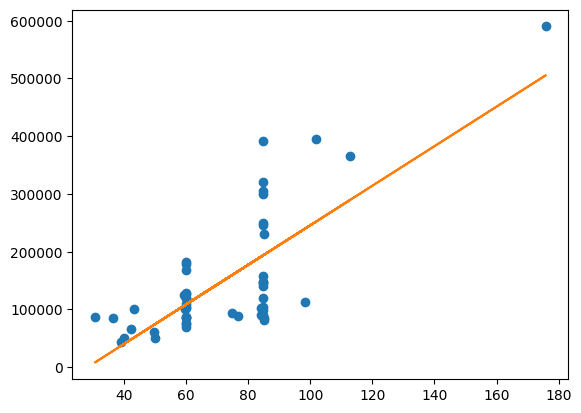

In [13]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

price = new_df['price']
space = new_df['space']

prices = list(map(str,price))

new_price = []

# 100,000 형태의 문자열을 치환한 후 정수로 변환
for i in range(0,len(prices)):
    temp = prices[i].replace(",","")
    new_price.append(int(temp))

# 실수형으로 변환
new_space = list(map(float,space))

new_price = np.array(new_price)
new_space = np.array(new_space)

linear_fitter = LinearRegression()
linear_fitter.fit(new_space.reshape(-1,1),new_price)

print(linear_fitter.predict([[87]]))

plt.plot(new_space,new_price,'o')
plt.plot(new_space, linear_fitter.predict(new_space.reshape(-1,1)))
plt.show()

In [14]:
# 선형 회귀로 확인 결과 59억원 데이터를 삭제하는 것이 도움이 될 것으로 보임

df2.drop([9], axis=0, inplace=True)

print(df2.head)

<bound method NDFrame.head of       price     space
0   105,000     59.99
1    90,000     84.95
2    75,482     59.97
3    87,000     59.94
4   127,850     59.97
5   101,500     43.27
6   127,000     59.97
7   102,500     59.99
8   120,000      84.9
10   86,500    30.726
11   85,500   36.5219
12  300,340     84.95
13  320,000     84.98
14  365,297  112.8548
15  230,000   84.9956
16  247,000   84.7509>


In [15]:
# 두 데이터 프레임 결합

new_df = pd.concat([df,df2])

pd.set_option('display.max_rows', None)

print(new_df)

      price     space
0    66,579     42.29
1   101,473     59.74
2    84,832   84.9939
3   104,650   84.8985
4    43,384    38.996
5    49,702    39.975
6    99,491   84.9625
7    76,500    59.975
8    82,000    84.997
9    69,000    59.996
10   89,000     76.65
11   85,186     59.96
12   50,500     49.92
13   87,000     59.96
14  125,000      59.5
15  120,000     59.97
16  120,000     59.97
17  148,000     84.99
18   93,300   74.9982
19  110,000     59.93
20  140,000   84.9243
21  145,000     84.94
22  147,500   84.9243
24  395,000    101.99
25  305,000     84.97
26  392,000     84.98
27  178,000   59.9751
28  168,658   59.9742
29  182,388   59.9742
30  250,000   84.9642
31  158,109     84.99
32   60,600    49.795
33   90,135   84.1946
34  112,200   98.4933
35  102,998   84.1946
0   105,000     59.99
1    90,000     84.95
2    75,482     59.97
3    87,000     59.94
4   127,850     59.97
5   101,500     43.27
6   127,000     59.97
7   102,500     59.99
8   120,000      84.9
10   86,50

[190327.94646405]


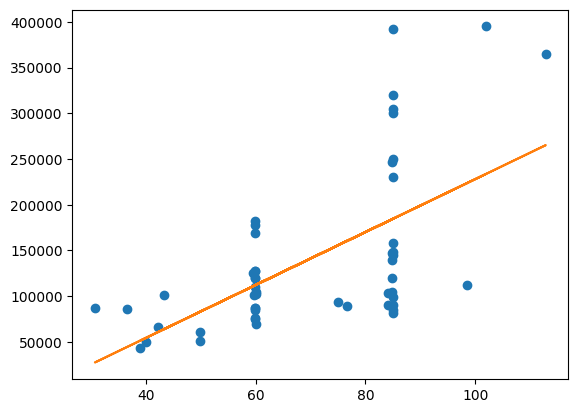

In [16]:
# 선형 회귀
price = new_df['price']
space = new_df['space']

prices = list(map(str,price))

new_price = []

# 100,000 형태의 문자열을 치환한 후 정수로 변환
for i in range(0,len(prices)):
    temp = prices[i].replace(",","")
    new_price.append(int(temp))

# 실수형으로 변환
new_space = list(map(float,space))

new_price = np.array(new_price)
new_space = np.array(new_space)

linear_fitter = LinearRegression()
linear_fitter.fit(new_space.reshape(-1,1),new_price)

print(linear_fitter.predict([[87]]))

plt.plot(new_space,new_price,'o')
plt.plot(new_space, linear_fitter.predict(new_space.reshape(-1,1)))
plt.show()

In [17]:
# 일반 부동산 거래 예시 데이터
url2=f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey={api_keys.encoding_key}&LAWD_CD=11200&DEAL_YMD=201602'

response2 = urlopen(url2)

print(url2)

result2 = BeautifulSoup(response2,'xml')
items2 = result2.find_all('item')

print(items2)

http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey=v7B0tEbMiKVQgBnetmAWaDANBgYRM%2F2Cla%2BOTLC7%2FVQJQGPCwPKQkENMiPcKjODZGZz%2FrmsOUfecJmbYyV63Dg%3D%3D&LAWD_CD=11200&DEAL_YMD=201602
[<item><거래금액>    35,000</거래금액><거래유형> </거래유형><건축년도>1989</건축년도><년>2016</년><도로명>왕십리로31나길</도로명><도로명건물본번호코드>00022</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11200</도로명시군구코드><도로명일련번호코드>01</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4109448</도로명코드><법정동> 하왕십리동</법정동><법정동본번코드>0990</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11200</법정동시군구코드><법정동읍면동코드>10200</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>한신무학</아파트><월>2</월><일>1</일><일련번호>11200-5</일련번호><전용면적>62.41</전용면적><중개사소재지> </중개사소재지><지번>990</지번><지역코드>11200</지역코드><층>13</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>, <item><거래금액>    13,000</거래금액><거래유형> </거래유형><건축년도>2013</건축년도><년>2016</년><도로명>무학봉28길</도로명><도로명건물본번호코드>00005</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11200</도로명시군구코드><도로명일련번호코드>01</도로명일련번호코드><도로

In [18]:
# 데이터의 수가 분양권 전매보다 많으므로 1월부터 5월까지의 데이터만을 사용하는 것으로 결정
datas = []

def get_datas(region_code):
    # 1월부터 5월까지의 거래내역
    for i in range(1,6):
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey={api_keys.encoding_key}&LAWD_CD={region_code}&DEAL_YMD=20230{i}'
        response = urlopen(url)
        result = BeautifulSoup(response,'xml')
        items = result.find_all('item')
        data = []
        for item in items:
            price = item.find('거래금액').text
            space = item.find('전용면적').text
            data = [price, space]
        if(len(data) != 0):
            datas.append(data)
        
for code in region_codes:
    print(code)
    get_datas(code)
    
print(datas)

11110
11140
11170
11200
11215
1123011260
11290
11305
11320
11335
11350
11380
11410
11440
11470
11500
11530
11545
11560
11590
11620
11650
11680
11710
11740
[['    99,960', '84.92'], ['    72,000', '59.9426'], ['    13,000', '19.466'], ['   183,500', '84.8359'], ['    13,400', '19.466'], ['    23,000', '19.06'], ['   101,000', '84.85'], ['   150,000', '145.1'], ['   104,000', '84.85'], ['   116,000', '84.88'], ['   176,000', '84.89'], ['    24,500', '45.26'], ['    16,000', '13.69'], ['    65,000', '107.83'], ['   243,000', '100.29'], ['    69,000', '59.94'], ['   128,000', '84.96'], ['   105,000', '59.99'], ['   147,500', '84.88'], ['    83,000', '59.936'], ['   180,000', '158.26'], ['   105,000', '84.97'], ['   100,000', '84.92'], ['    79,000', '59.98'], ['   110,000', '84.76'], ['    90,000', '114.86'], ['    50,000', '59.58'], ['    51,000', '59.58'], ['    88,000', '132.96'], ['    63,500', '84.8'], ['    81,000', '84.67'], ['    73,000', '114.85'], ['    74,800', '59.818'], ['    

In [19]:
# 데이터 프레임 생성
df_b = pd.DataFrame(datas, columns=['price','space'])

print(df_b.head)

<bound method NDFrame.head of           price     space
0        99,960     84.92
1        72,000   59.9426
2        13,000    19.466
3       183,500   84.8359
4        13,400    19.466
5        23,000     19.06
6       101,000     84.85
7       150,000     145.1
8       104,000     84.85
9       116,000     84.88
10      176,000     84.89
11       24,500     45.26
12       16,000     13.69
13       65,000    107.83
14      243,000    100.29
15       69,000     59.94
16      128,000     84.96
17      105,000     59.99
18      147,500     84.88
19       83,000    59.936
20      180,000    158.26
21      105,000     84.97
22      100,000     84.92
23       79,000     59.98
24      110,000     84.76
25       90,000    114.86
26       50,000     59.58
27       51,000     59.58
28       88,000    132.96
29       63,500      84.8
30       81,000     84.67
31       73,000    114.85
32       74,800    59.818
33       46,800     59.67
34       64,000     84.71
35       17,000     48.61
36      

[110780.09232076]


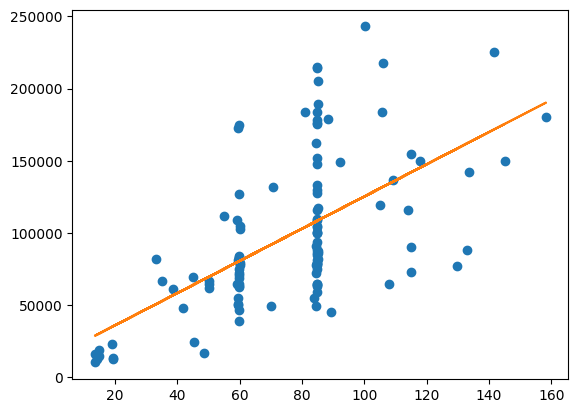

In [20]:
# 일반 부동산 거래에 대한 선형 회귀
price = df_b['price']
space = df_b['space']

prices = list(map(str,price))

new_price = []

# 왼쪽 공백을 제거하고 100,000 형태의 문자열을 치환한 후 정수로 변환
for i in range(0,len(prices)):
    temp = prices[i].lstrip()
    temp = temp.replace(",","")
    new_price.append(int(temp))

# 실수형으로 변환
new_space = list(map(float,space))

new_price = np.array(new_price)
new_space = np.array(new_space)

linear_fitter2 = LinearRegression()
linear_fitter2.fit(new_space.reshape(-1,1),new_price)

print(linear_fitter2.predict([[87]]))

plt.plot(new_space,new_price,'o')
plt.plot(new_space, linear_fitter2.predict(new_space.reshape(-1,1)))
plt.show()

168119.9275598929
102229.81208740079
206426.58859013242
116978.20941299405
244704.29522805876
131715.45904597535


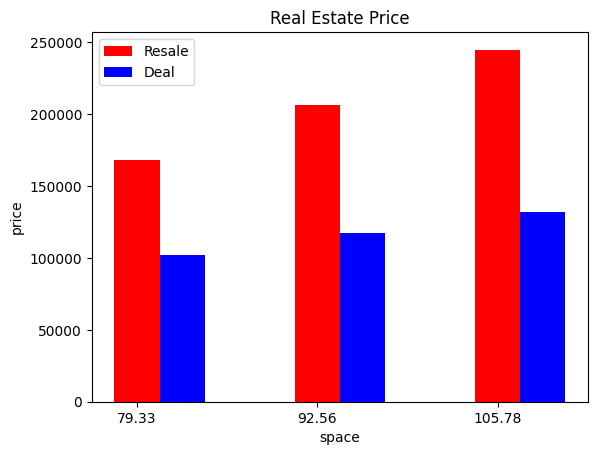

In [21]:
# 두 선형회귀 결과에서 대표적인 24평, 28평, 32평 아파트 가격 비교 위해 시각화

x = np.arange(3)
bar_width = 0.25

spaces = [79.33, 92.56, 105.78]
new_spaces = [79.33, 79.33, 92.56, 92.56, 105.78, 105.78]
prices = [linear_fitter.predict([[spaces[0]]]),linear_fitter2.predict([[spaces[0]]]), linear_fitter.predict([[spaces[1]]]),  linear_fitter2.predict([[spaces[1]]]), linear_fitter.predict([[spaces[2]]]),  linear_fitter2.predict([[spaces[2]]])]
prices = list(map(float,prices))

price1=[]
price2=[]
for i in range(len(prices)):
    print(prices[i])
    if(i%2 == 0):
        price1.append(prices[i])
    else:
        price2.append(prices[i])

plt.title("Real Estate Price")
plt.xlabel("space")
plt.ylabel("price")

p1 = plt.bar(x,price1, bar_width, color='r',label="Resale")
p2 = plt.bar(x + bar_width,price2, bar_width, color='b',label="Deal")
plt.legend((p1[0],p2[0]), ("Resale", "Deal"))
plt.xticks(x,spaces)
plt.show()